# Movie Reviews Classification
  * Positive
  * Neutral
  * Negative

# Data preparation

## Load data from drive

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
%cp '/content/MyDrive/MyDrive/Colab Notebooks/Data Processing/data/data_shuffled.pkl' '/content'

## Add more data cleaning
  * loại bỏ các row có giá trị cột 'Rate' = 3 hoặc = 7
  * sửa lại điều kiện pos: rate > 7, neu: 3 < rate < 7, neg: rate < 3

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', 200)

data = pd.read_pickle('/content/data_shuffled.pkl')
data = data.drop(columns=['Label'])

# Create a boolean mask based on the condition
mask = (data['Rate'] == 3) | (data['Rate'] == 7)

# Use the mask to select rows where 'label' is between 2 and 5 (inclusive), then drop them
data = data[~mask].copy()  # ~ is used to negate the mask
data

,Review,Rate
0,ok maybe loosely based true loose ever actually actor series come across complete idiot fighting charge bumbling ever turn doesnt really sound interestingeven im take partially true would watch su...,1
1,know slog along promising big reveal never deliver well go cant sleep,1
2,binged first three episode honestly cant wait next week instalment great lot interesting twist finger crossed high standard maintained right episode impressive faralyla browne magnificent job play...,9
3,inspection drama starring jeremy pope elli french young gay black man join marine escape abusive mother find place worldthis powerful emotional experience pope give incredible performance elli str...,8
5,standardyawn plotgirl running busy looking back v ahead fall lovely dr obvious mark guessing identical trauma husband make dumb business decision legal protectionyawntries tell wife interrupt spew...,1
...,...,...
73981,tell baseline tv guessed history behavior incident conflict etc use tell accent exposition necessary literally set stage play screen tell poor viewing decisionat almost exact midpoint savage salva...,1
73983,first miniseries amazing start finish cast great matthew goode really steal robert evans god im surprised golden globe never considered nomination rare miniseries come along take back history see ...,10
73984,recorded hoped see scenery glacier national park presented obvious right away wasnt glacier national park thought must canadian glacier national park much farther north along tch nope either turn ...,5
73985,saw sneak preview today wife im veteran player dm shes never played laughed whole thing riveted action sequence indicating excellent intro world dd inexperienced enchanted got right iconic monster...,9


In [ ]:
import numpy as np

# Điều kiện và các giá trị tương ứng
conditions = [data['Rate'] <= 3, (data['Rate'] > 3) & (data['Rate'] < 7), data['Rate'] >= 7]
values = ['negative', 'neutral', 'positive']

# Sử dụng np.select() để áp dụng điều kiện và tạo cột mới 'Label'
data['Label'] = np.select(conditions, values)
data

,Review,Rate,Label
0,ok maybe loosely based true loose ever actually actor series come across complete idiot fighting charge bumbling ever turn doesnt really sound interestingeven im take partially true would watch su...,1,negative
1,know slog along promising big reveal never deliver well go cant sleep,1,negative
2,binged first three episode honestly cant wait next week instalment great lot interesting twist finger crossed high standard maintained right episode impressive faralyla browne magnificent job play...,9,positive
3,inspection drama starring jeremy pope elli french young gay black man join marine escape abusive mother find place worldthis powerful emotional experience pope give incredible performance elli str...,8,positive
5,standardyawn plotgirl running busy looking back v ahead fall lovely dr obvious mark guessing identical trauma husband make dumb business decision legal protectionyawntries tell wife interrupt spew...,1,negative
...,...,...,...
73981,tell baseline tv guessed history behavior incident conflict etc use tell accent exposition necessary literally set stage play screen tell poor viewing decisionat almost exact midpoint savage salva...,1,negative
73983,first miniseries amazing start finish cast great matthew goode really steal robert evans god im surprised golden globe never considered nomination rare miniseries come along take back history see ...,10,positive
73984,recorded hoped see scenery glacier national park presented obvious right away wasnt glacier national park thought must canadian glacier national park much farther north along tch nope either turn ...,5,neutral
73985,saw sneak preview today wife im veteran player dm shes never played laughed whole thing riveted action sequence indicating excellent intro world dd inexperienced enchanted got right iconic monster...,9,positive


In [ ]:
label_counts = data['Label'].value_counts()
label_counts = label_counts.sort_index(ascending=False)
label_counts

positive    20937
neutral     21867
negative    20309
Name: Label, dtype: int64

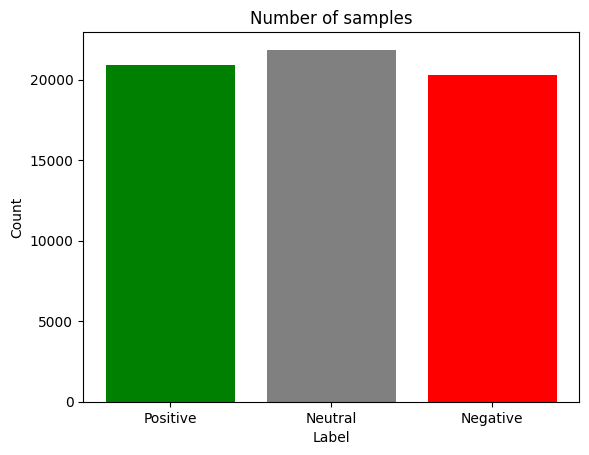

In [ ]:
import matplotlib.pyplot as plt

plt.bar(label_counts.index, label_counts.values, tick_label=['Positive', 'Neutral', 'Negative'], color=['green', 'gray', 'red'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of samples')
plt.show()

### Trước khi loại bỏ danh từ

In [ ]:
data_clean = data.copy()
data_pos = data_clean[data_clean['Label'] == 'positive']
list_pos = ' '.join(list(data_pos['Review'])).split(' ')
data_neu = data_clean[data_clean['Label'] == 'neutral']
list_neu = ' '.join(list(data_neu['Review'])).split(' ')
data_neg = data_clean[data_clean['Label'] == 'negative']
list_neg = ' '.join(list(data_neg['Review'])).split(' ')

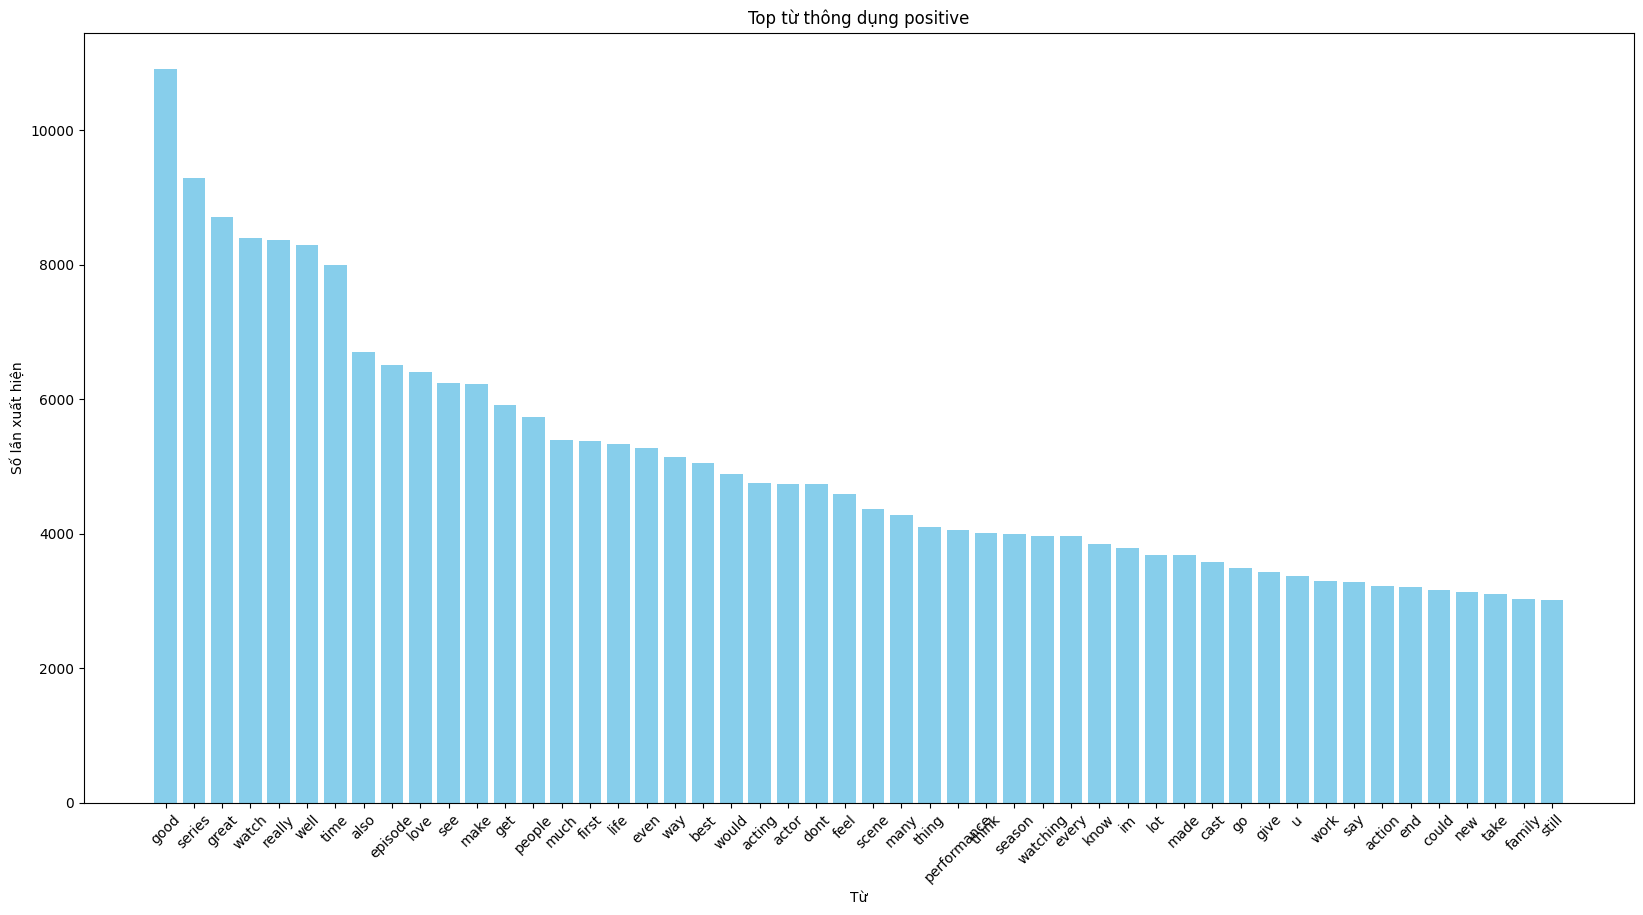

In [ ]:
from collections import Counter

word_counts_pos = Counter(list_pos)

# Lấy ra top 50 từ thông dụng nhất
top_words = word_counts_pos.most_common(50)

# Chia thành 2 list: từ và tần suất
words, counts = zip(*top_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top từ thông dụng positive')
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần
plt.show()

In [ ]:
pos_tag(list(words))

[('good', 'JJ'),
 ('series', 'NN'),
 ('great', 'JJ'),
 ('watch', 'NN'),
 ('really', 'RB'),
 ('well', 'RB'),
 ('time', 'NN'),
 ('also', 'RB'),
 ('episode', 'RB'),
 ('love', 'VB'),
 ('see', 'NNS'),
 ('make', 'VBP'),
 ('get', 'VB'),
 ('people', 'NNS'),
 ('much', 'RB'),
 ('first', 'JJ'),
 ('life', 'NN'),
 ('even', 'RB'),
 ('way', 'NN'),
 ('best', 'JJS'),
 ('would', 'MD'),
 ('acting', 'VBG'),
 ('actor', 'NN'),
 ('dont', 'NN'),
 ('feel', 'VB'),
 ('scene', 'RB'),
 ('many', 'JJ'),
 ('thing', 'NN'),
 ('performance', 'NN'),
 ('think', 'VBP'),
 ('season', 'NN'),
 ('watching', 'VBG'),
 ('every', 'DT'),
 ('know', 'NN'),
 ('im', 'NN'),
 ('lot', 'NN'),
 ('made', 'VBD'),
 ('cast', 'NN'),
 ('go', 'VB'),
 ('give', 'JJ'),
 ('u', 'JJ'),
 ('work', 'NN'),
 ('say', 'VBP'),
 ('action', 'NN'),
 ('end', 'NN'),
 ('could', 'MD'),
 ('new', 'JJ'),
 ('take', 'VB'),
 ('family', 'NN'),
 ('still', 'RB')]

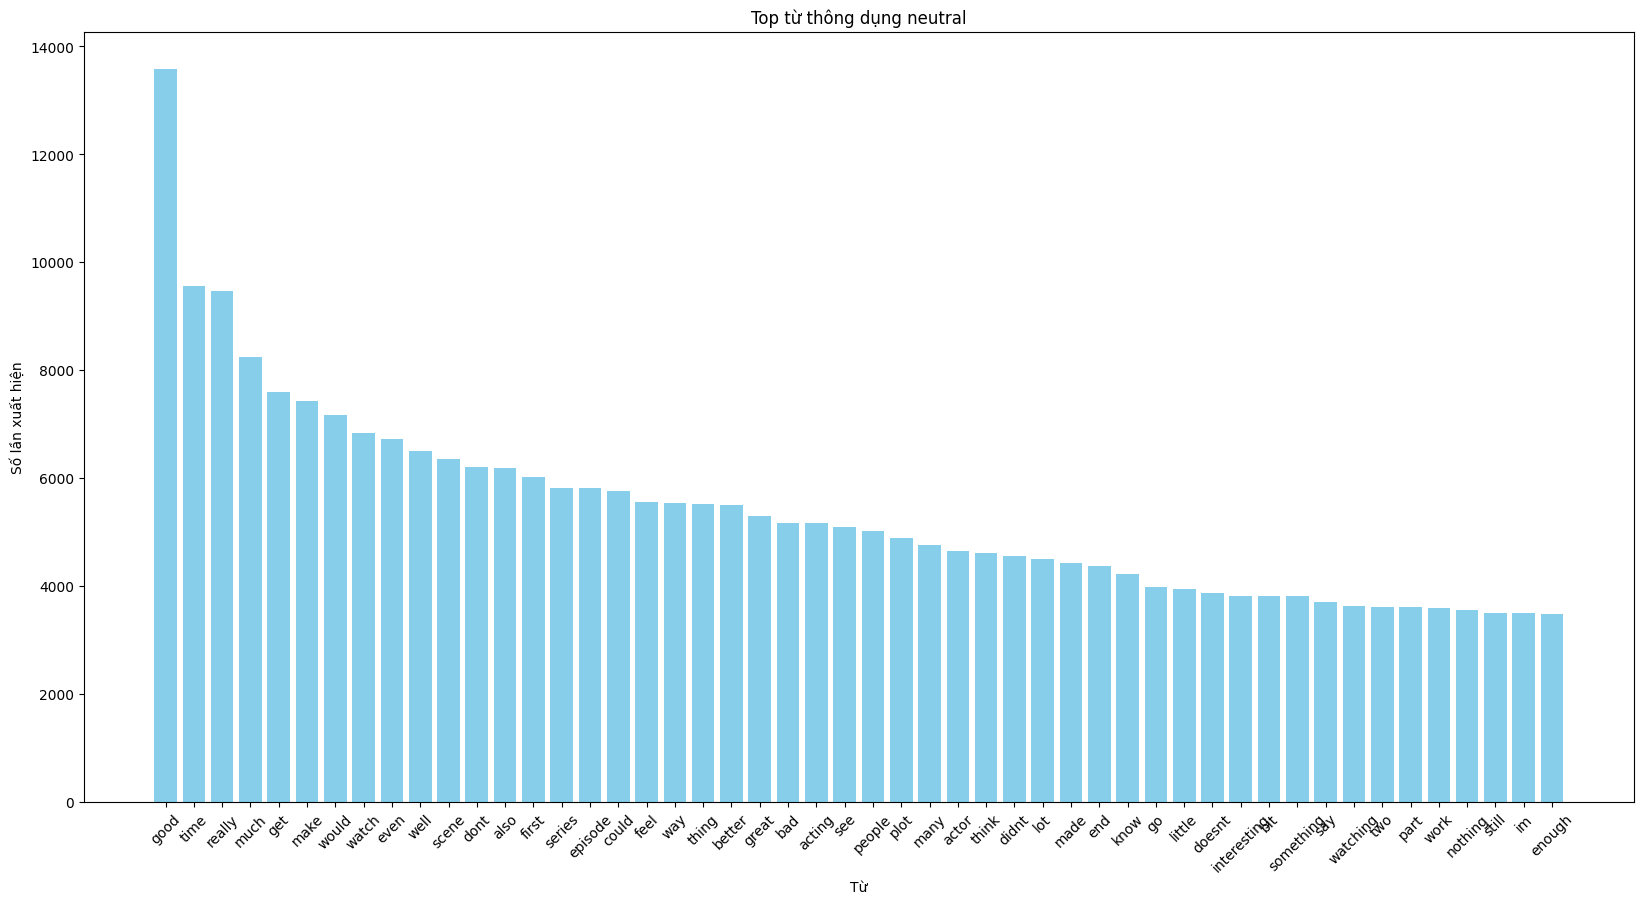

In [ ]:
from collections import Counter

word_counts_neu = Counter(list_neu)

# Lấy ra top 50 từ thông dụng nhất
top_words = word_counts_neu.most_common(50)

# Chia thành 2 list: từ và tần suất
words, counts = zip(*top_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top từ thông dụng neutral')
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần
plt.show()

In [ ]:
pos_tag(list(words))

[('good', 'JJ'),
 ('time', 'NN'),
 ('really', 'RB'),
 ('much', 'JJ'),
 ('get', 'NNS'),
 ('make', 'VBP'),
 ('would', 'MD'),
 ('watch', 'VB'),
 ('even', 'RB'),
 ('well', 'RB'),
 ('scene', 'NN'),
 ('dont', 'NN'),
 ('also', 'RB'),
 ('first', 'JJ'),
 ('series', 'NN'),
 ('episode', 'NN'),
 ('could', 'MD'),
 ('feel', 'VB'),
 ('way', 'NN'),
 ('thing', 'NN'),
 ('better', 'RBR'),
 ('great', 'JJ'),
 ('bad', 'JJ'),
 ('acting', 'VBG'),
 ('see', 'NN'),
 ('people', 'NNS'),
 ('plot', 'VBP'),
 ('many', 'JJ'),
 ('actor', 'NN'),
 ('think', 'VBP'),
 ('didnt', 'NN'),
 ('lot', 'NN'),
 ('made', 'VBD'),
 ('end', 'NN'),
 ('know', 'VB'),
 ('go', 'VB'),
 ('little', 'JJ'),
 ('doesnt', 'NN'),
 ('interesting', 'VBG'),
 ('bit', 'NN'),
 ('something', 'NN'),
 ('say', 'VBP'),
 ('watching', 'VBG'),
 ('two', 'CD'),
 ('part', 'NN'),
 ('work', 'NN'),
 ('nothing', 'NN'),
 ('still', 'RB'),
 ('im', 'VBZ'),
 ('enough', 'JJ')]

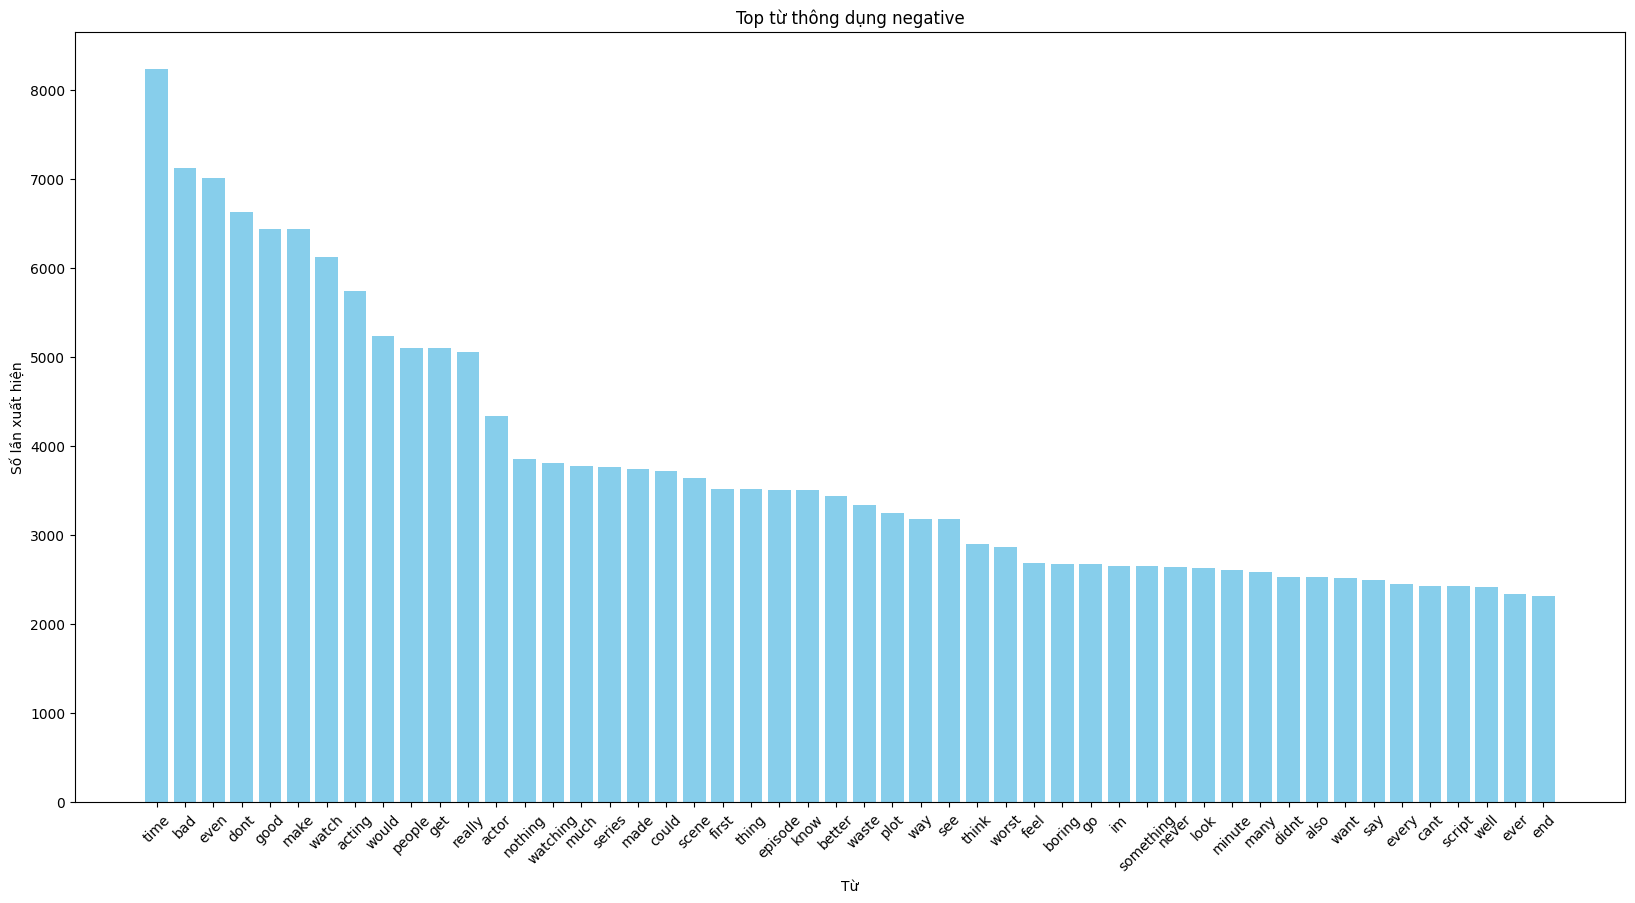

In [ ]:
from collections import Counter

word_counts_neg = Counter(list_neg)

# Lấy ra top 50 từ thông dụng nhất
top_words = word_counts_neg.most_common(50)

# Chia thành 2 list: từ và tần suất
words, counts = zip(*top_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top từ thông dụng negative')
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần
plt.show()

In [ ]:
pos_tag(list(words))

[('time', 'NN'),
 ('bad', 'JJ'),
 ('even', 'RB'),
 ('dont', 'VBP'),
 ('good', 'JJ'),
 ('make', 'NN'),
 ('watch', 'NN'),
 ('acting', 'VBG'),
 ('would', 'MD'),
 ('people', 'NNS'),
 ('get', 'VB'),
 ('really', 'RB'),
 ('actor', 'JJ'),
 ('nothing', 'NN'),
 ('watching', 'VBG'),
 ('much', 'JJ'),
 ('series', 'NN'),
 ('made', 'VBN'),
 ('could', 'MD'),
 ('scene', 'VB'),
 ('first', 'JJ'),
 ('thing', 'NN'),
 ('episode', 'NN'),
 ('know', 'VBP'),
 ('better', 'JJR'),
 ('waste', 'NN'),
 ('plot', 'NN'),
 ('way', 'NN'),
 ('see', 'VBP'),
 ('think', 'VBP'),
 ('worst', 'JJS'),
 ('feel', 'NN'),
 ('boring', 'VBG'),
 ('go', 'VB'),
 ('im', 'JJ'),
 ('something', 'NN'),
 ('never', 'RB'),
 ('look', 'VBP'),
 ('minute', 'JJ'),
 ('many', 'JJ'),
 ('didnt', 'NNS'),
 ('also', 'RB'),
 ('want', 'VBP'),
 ('say', 'VBP'),
 ('every', 'DT'),
 ('cant', 'NN'),
 ('script', 'NN'),
 ('well', 'RB'),
 ('ever', 'RB'),
 ('end', 'VB')]

In [ ]:
pos_tag(['dont', 'didnt', 'doesnt'])

[('dont', 'NN'), ('didnt', 'NN'), ('doesnt', 'NN')]

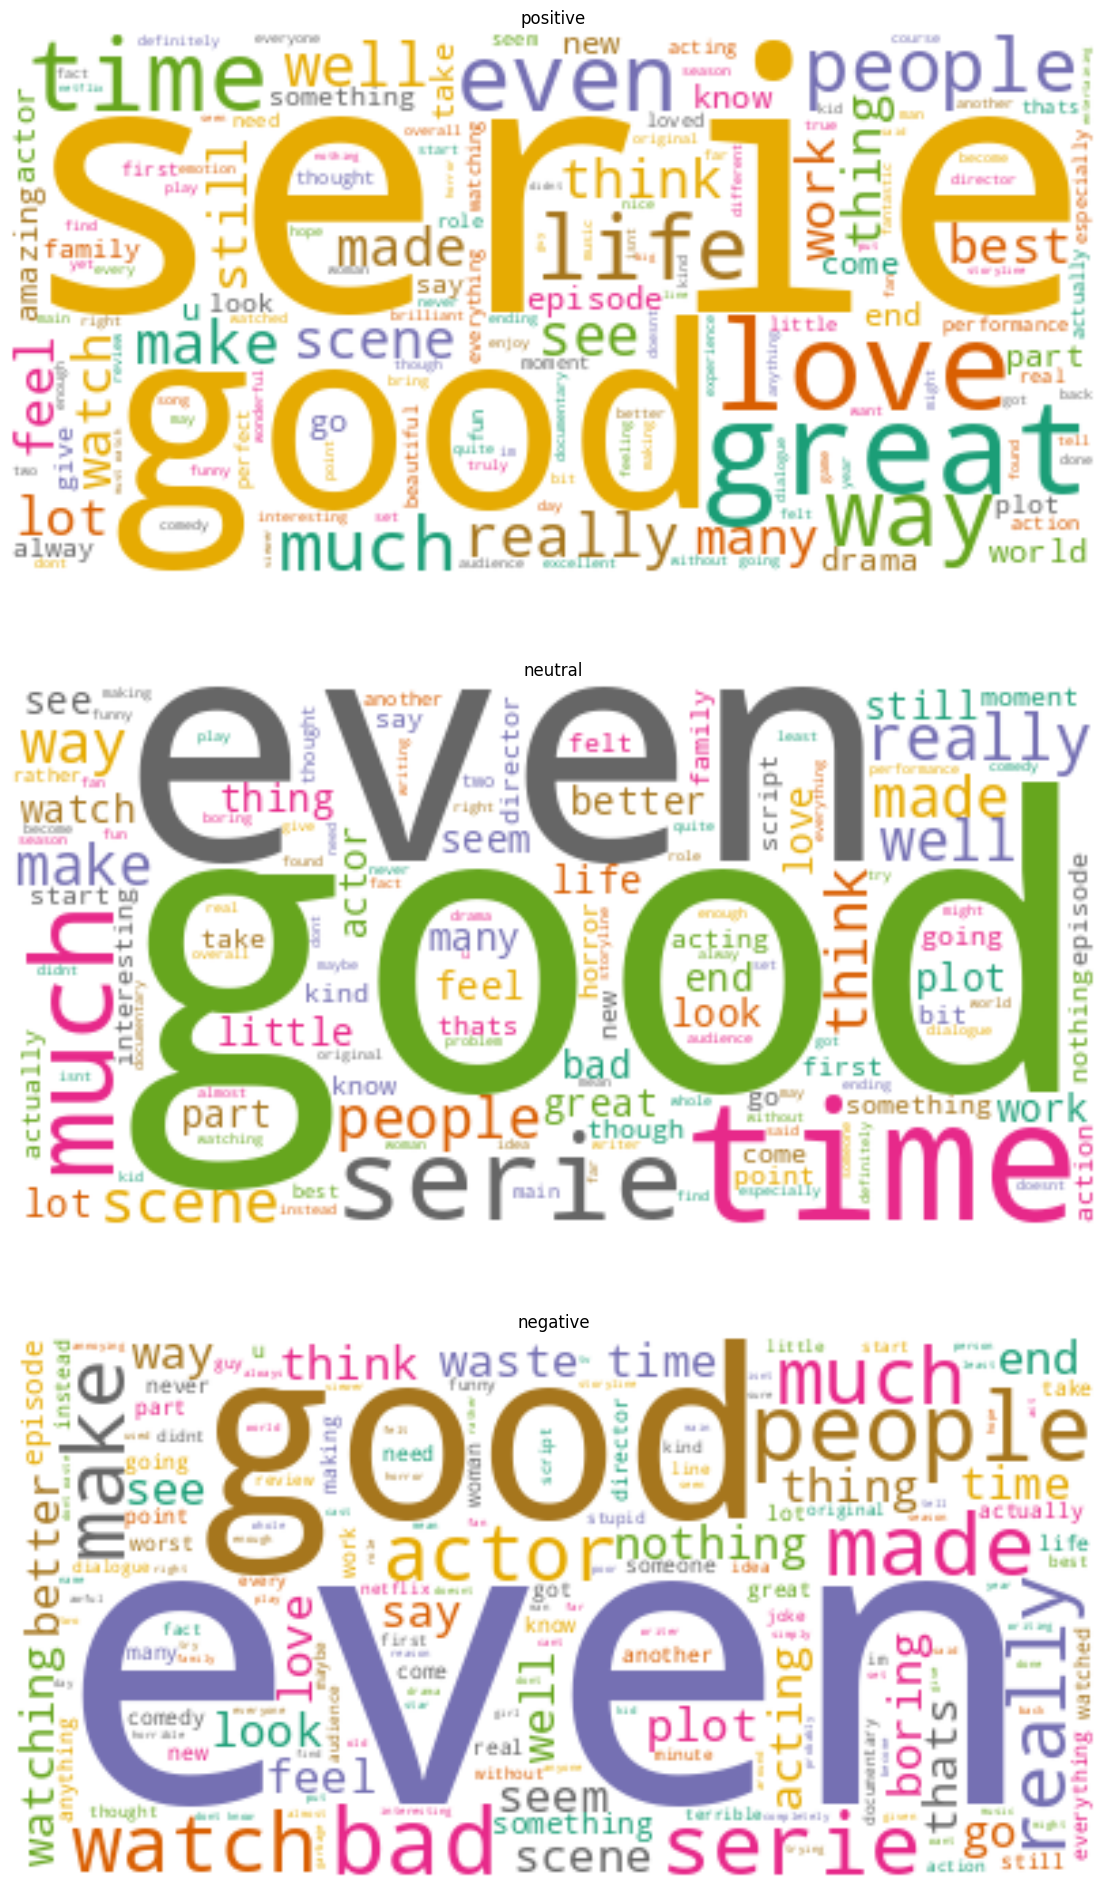

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.figure(figsize=(16, 24))
data = [list_pos, list_neu, list_neg]
title = ['positive', 'neutral', 'negative']
for i in range(len(data)):
    wc.generate(' '.join(data[i]))
    plt.subplot(3, 1, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title[i])

plt.show()

### Sau khi loại bỏ danh từ

In [ ]:
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

list_except = ['dont', 'doesnt', 'didnt', 'cant', 'couldnt', 'shouldnt', 'isnt', 'arent', 'hasnt', 'havent' 'wont']
def remove_nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if not is_noun(pos) & (word not in list_except)]
    return ' '.join(all_nouns)

In [ ]:
data_clean = pd.DataFrame({'Review': data['Review'].apply(remove_nouns), 'Rate': data['Rate'], 'Label': data['Label']})
data_clean

,Review,Rate,Label
0,ok maybe loosely based true loose ever actually actor come across complete fighting bumbling ever turn doesnt really sound interestingeven take partially true would watch supposed funny bumbling a...,1,negative
1,know along promising big never deliver well go cant,1,negative
2,binged first three honestly cant next instalment great interesting crossed high maintained right impressive magnificent playing young hart great young certain futurethe senior set would make colle...,9,positive
3,starring jeremy french young black marine abusive find worldthis powerful emotional give incredible survive homophobic also dealing unresolved trauma supported great especially raúl sympathetic bo...,8,positive
5,running busy looking back v ahead fall lovely dr obvious guessing identical make dumb legal tell interrupt asks going say hundred identical showsschool doesnt si fake done writing,1,negative
...,...,...,...
73981,tell baseline guessed accent necessary literally set tell poor almost exact despite thus far jack main launch tell deputy deniros followed rehashing killing used open minor yet payoff continue bet...,1,negative
73983,first amazing finish great really steal god surprised golden never considered rare come along take back greatest ever made made behind every didnt miss amazing highly recommend anger award recogni...,10,positive
73984,recorded hoped see scenery glacier national presented obvious right away wasnt glacier national thought must canadian glacier national much farther north along tch either either identified fernie ...,5,neutral
73985,never played laughed whole riveted indicating excellent intro inexperienced enchanted got right iconic feeling organic adventuring coming together combining strengthsbest lived since open got see ...,9,positive


In [ ]:
data_pos = data_clean[data_clean['Label'] == 'positive']
list_pos = ' '.join(list(data_pos['Review'])).split(' ')
data_neu = data_clean[data_clean['Label'] == 'neutral']
list_neu = ' '.join(list(data_neu['Review'])).split(' ')
data_neg = data_clean[data_clean['Label'] == 'negative']
list_neg = ' '.join(list(data_neg['Review'])).split(' ')

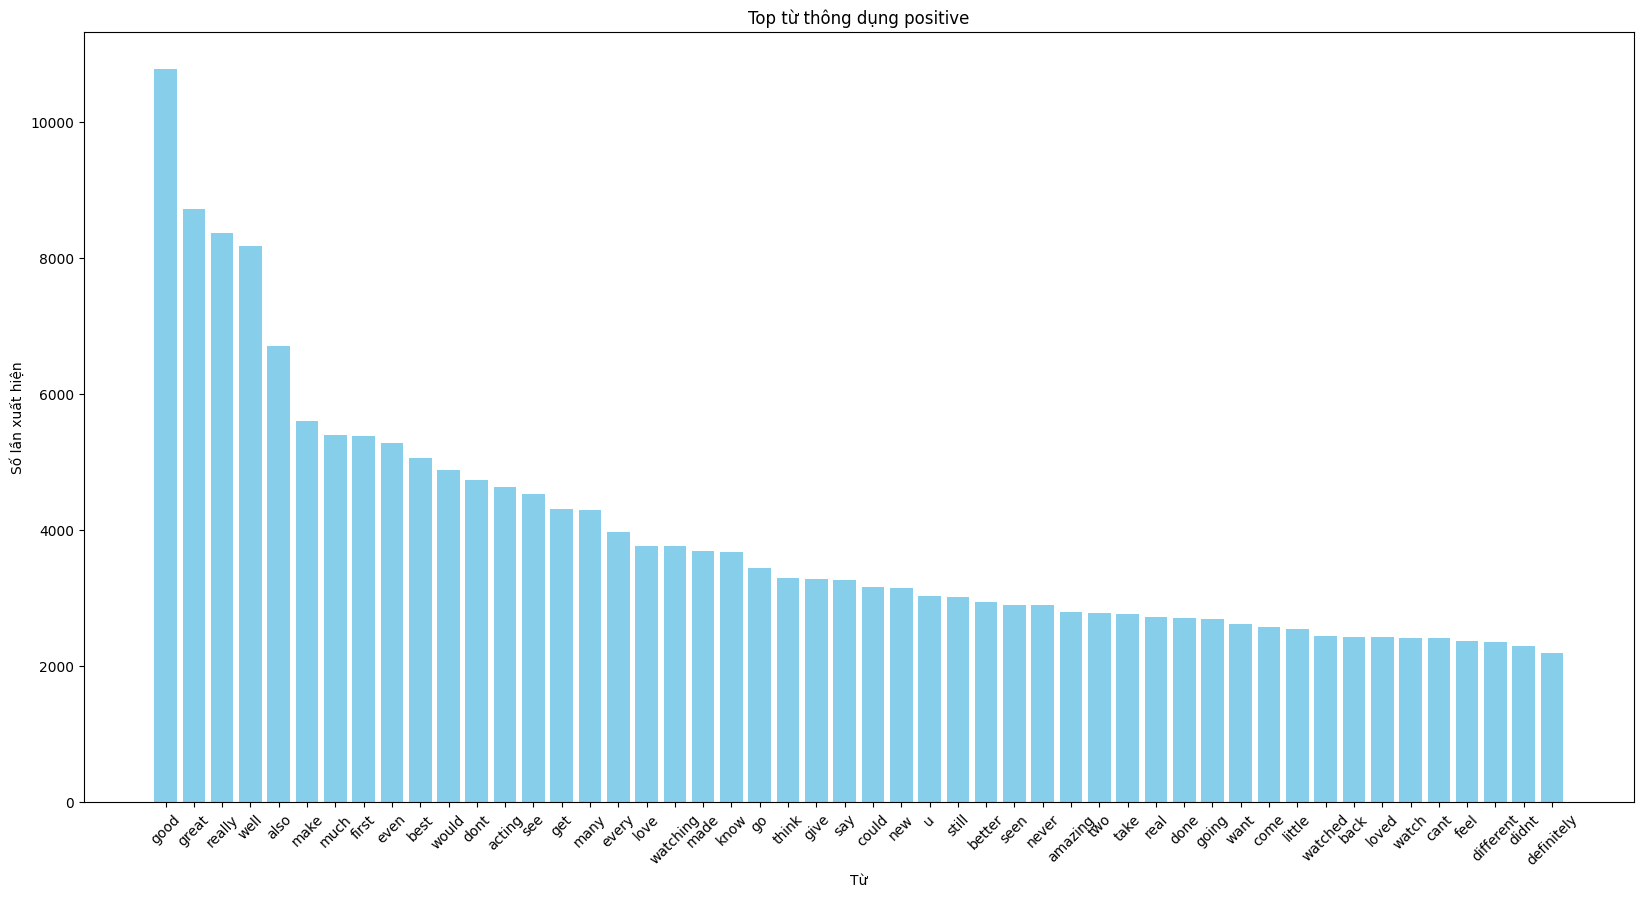

In [ ]:
from collections import Counter

word_counts_pos = Counter(list_pos)

# Lấy ra top 50 từ thông dụng nhất
top_words = word_counts_pos.most_common(50)

# Chia thành 2 list: từ và tần suất
words, counts = zip(*top_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top từ thông dụng positive')
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần
plt.show()

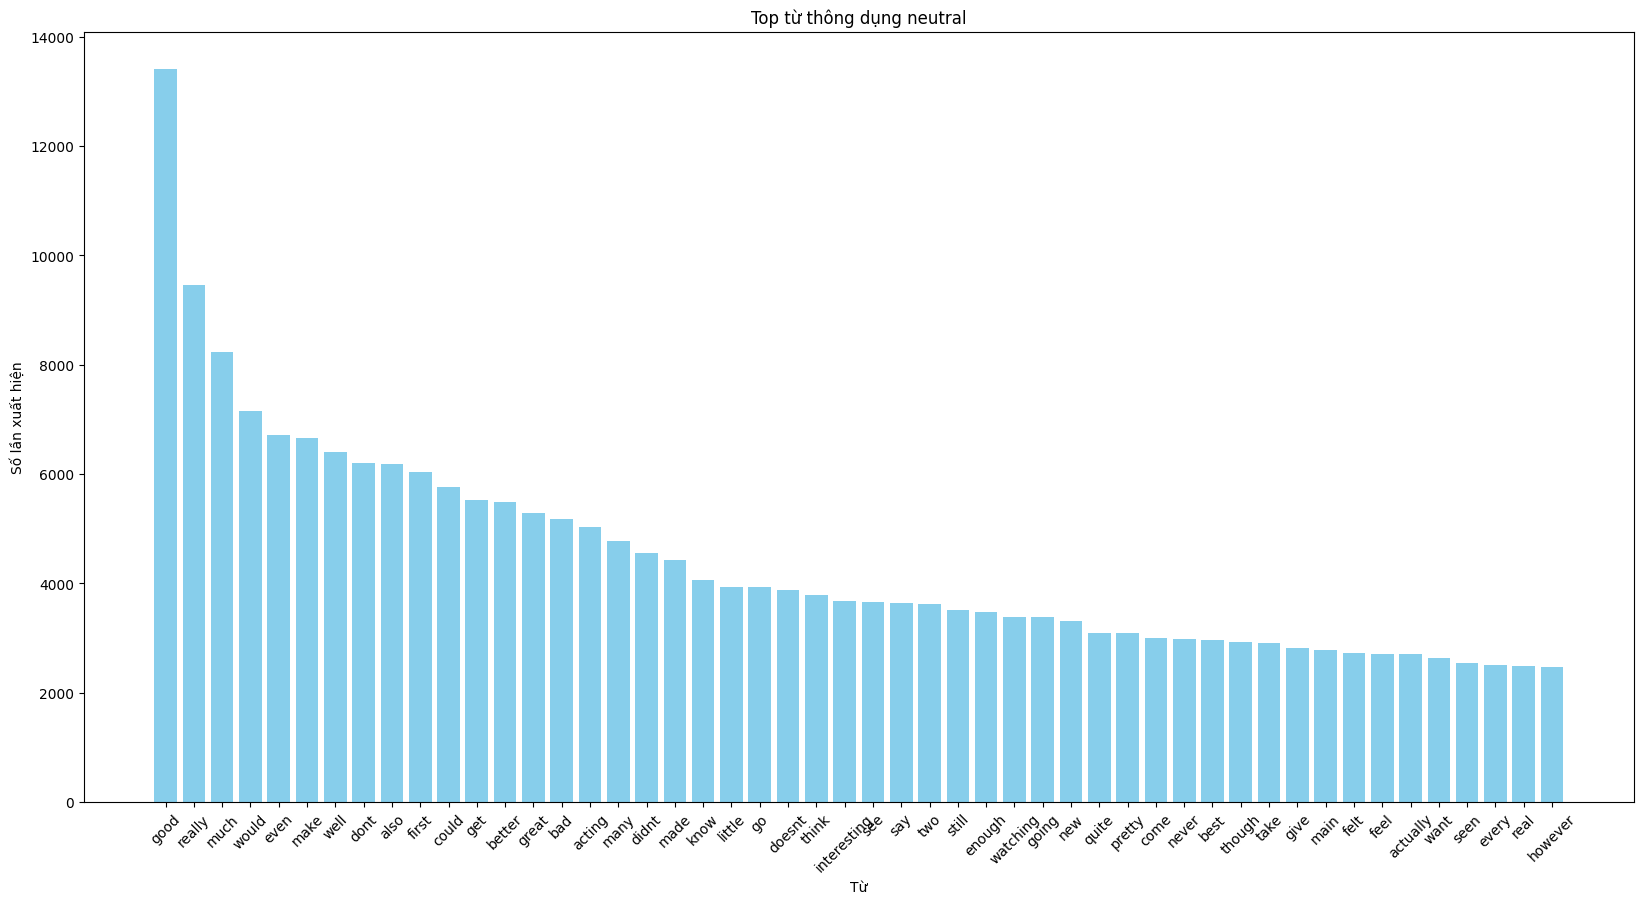

In [ ]:
from collections import Counter

word_counts_neu = Counter(list_neu)

# Lấy ra top 50 từ thông dụng nhất
top_words = word_counts_neu.most_common(50)

# Chia thành 2 list: từ và tần suất
words, counts = zip(*top_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top từ thông dụng neutral')
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần
plt.show()

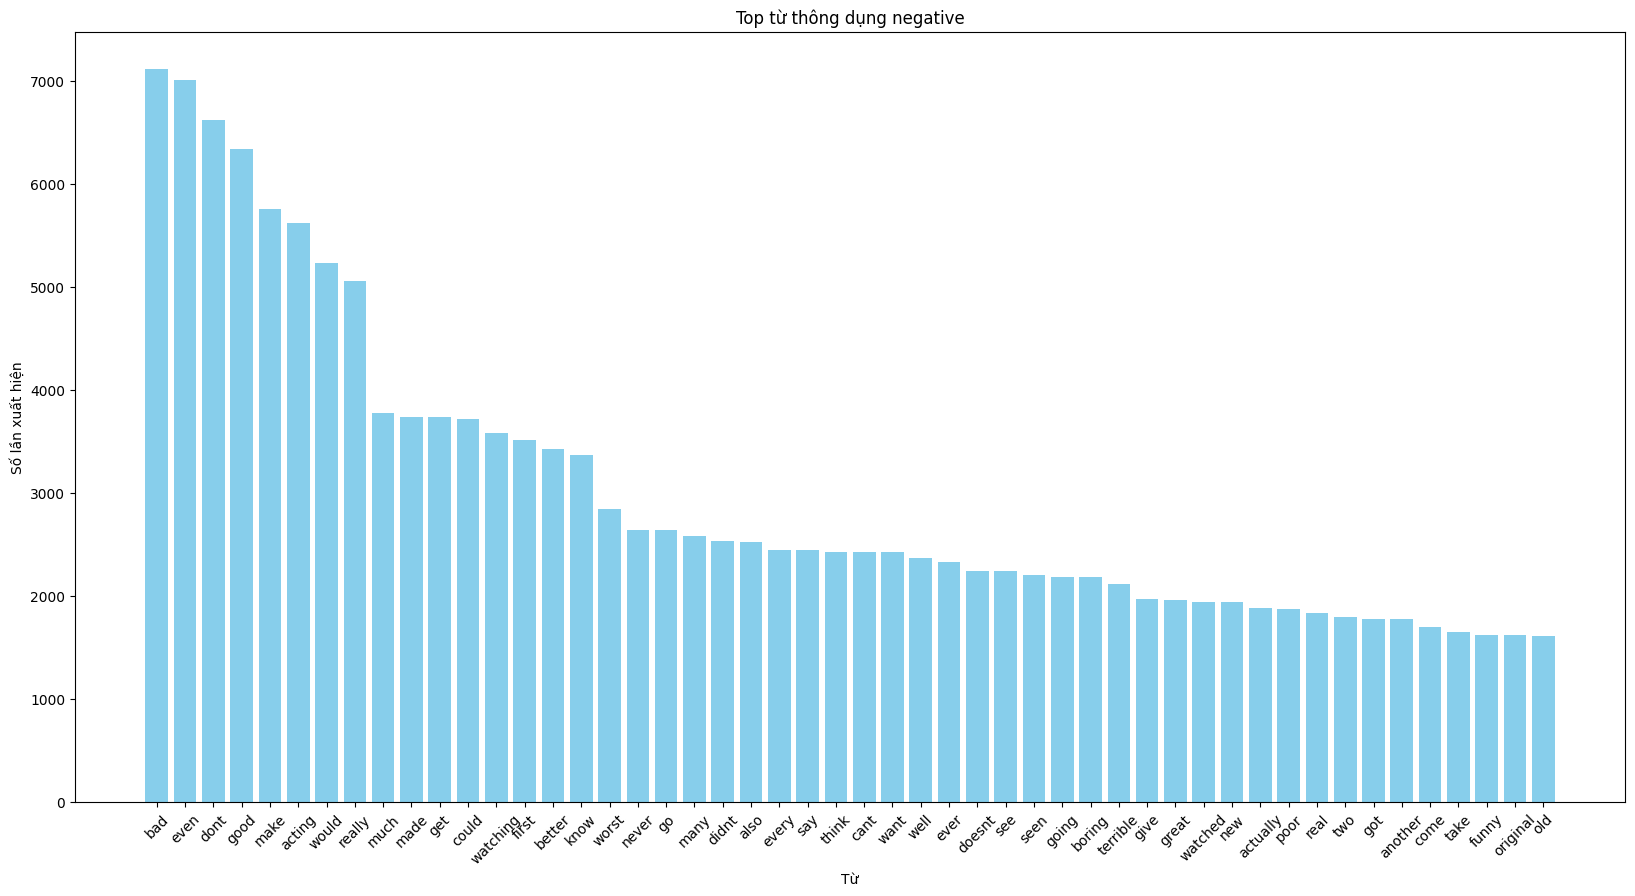

In [ ]:
from collections import Counter

word_counts_neg = Counter(list_neg)

# Lấy ra top 50 từ thông dụng nhất
top_words = word_counts_neg.most_common(50)

# Chia thành 2 list: từ và tần suất
words, counts = zip(*top_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top từ thông dụng negative')
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần
plt.show()

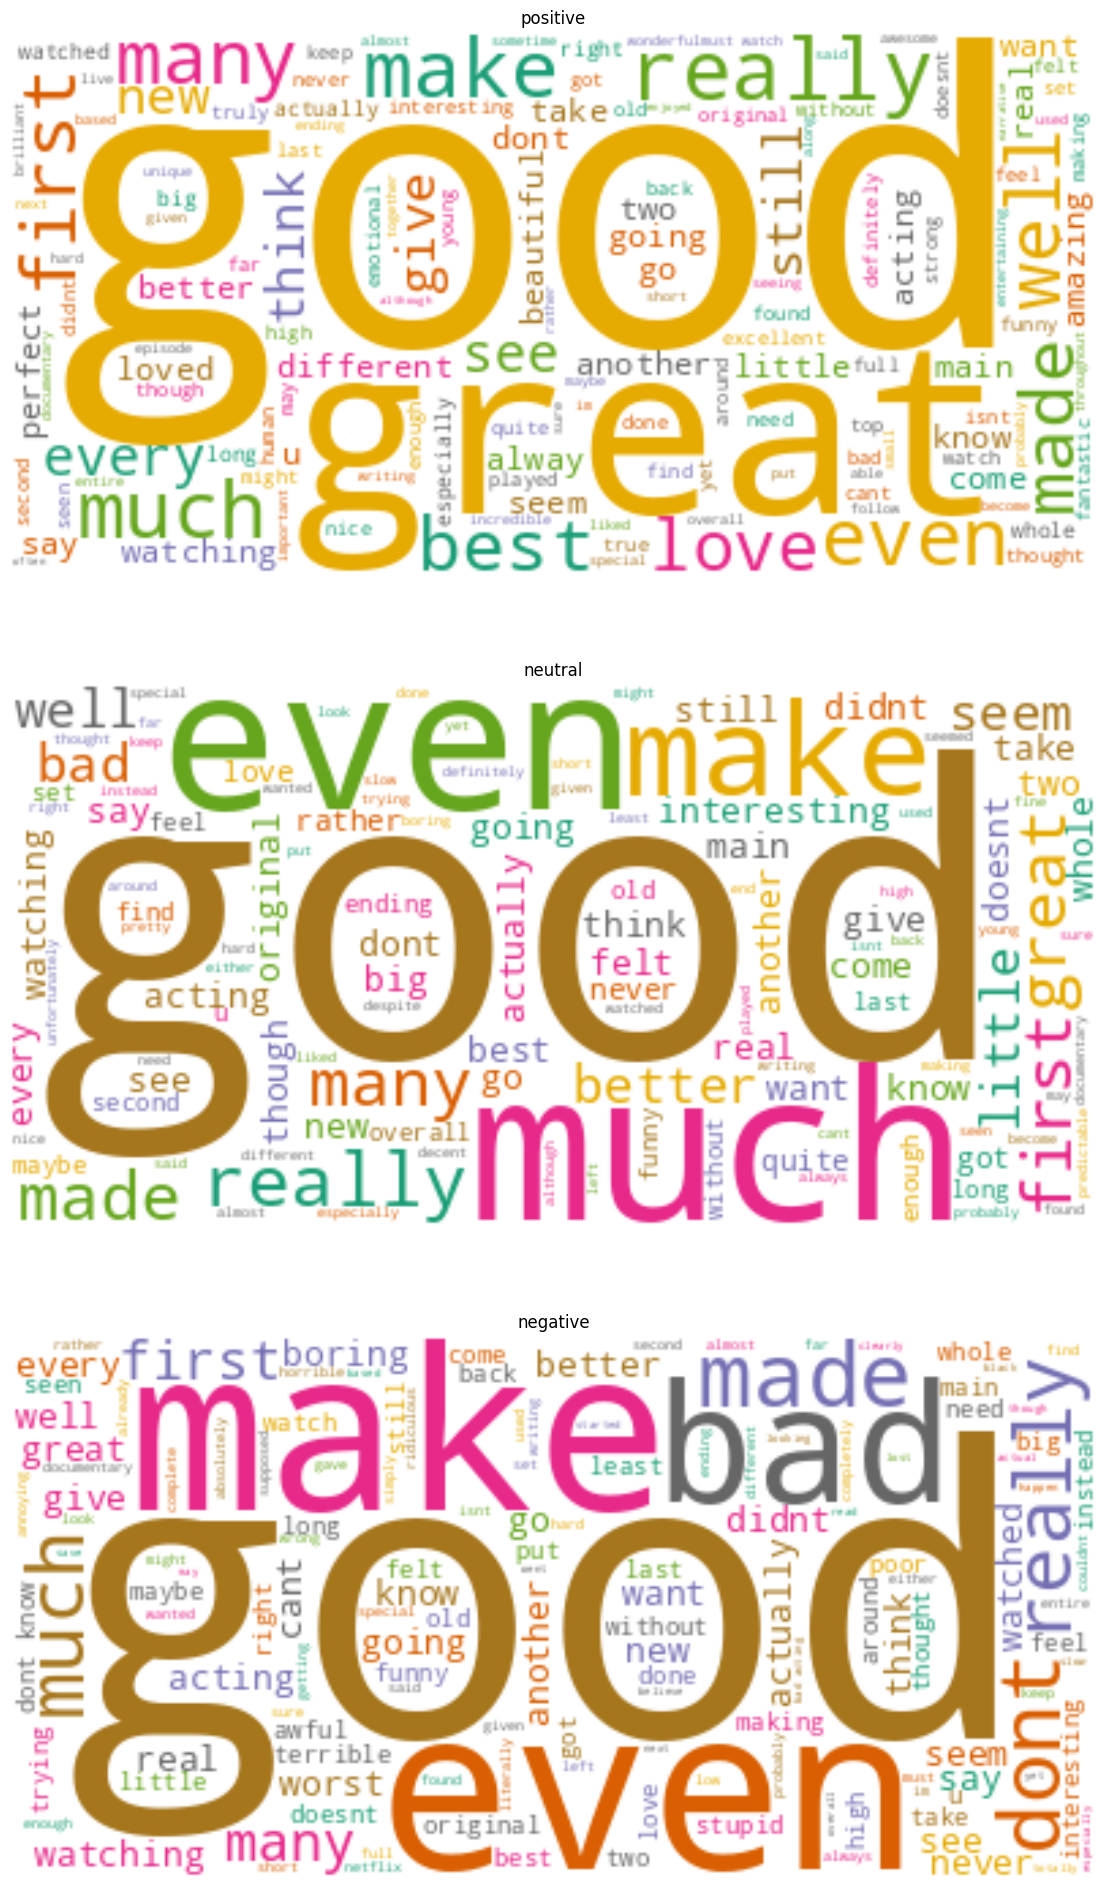

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.figure(figsize=(16, 24))
data = [list_pos, list_neu, list_neg]
title = ['positive', 'neutral', 'negative']
for i in range(len(data)):
    wc.generate(' '.join(data[i]))
    plt.subplot(3, 1, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title[i])

plt.show()

# Save data to drive

In [ ]:
import pickle

data_clean.to_pickle('/content/MyDrive/MyDrive/Colab Notebooks/Data Processing/data/data_shuffled_remove_noun.pkl')